<a href="https://colab.research.google.com/github/tasyasvdh09/PCVK_Genap_2023/blob/main/Progress%202_Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import folder yang ada di drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Proses Segmentasi Kulit warna original citra diubah ke citra model likehood.

In [22]:
def skin_segmentation(image):
    # Mengubah citra menjadi ruang warna YCrCb
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Menginisialisasi batas atas dan batas bawah untuk deteksi kulit
    lower_skin = np.array([0, 133, 77], dtype=np.uint8)
    upper_skin = np.array([255, 173, 127], dtype=np.uint8)

    # Menerapkan mask untuk mendapatkan area kulit
    skin_mask = cv2.inRange(ycrcb, lower_skin, upper_skin)

    # Mengaplikasikan operasi morfologi untuk memperbaiki segmentasi kulit
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    skin_mask = cv2.dilate(skin_mask, kernel, iterations=1)

    # Menggabungkan mask dengan citra asli
    segmented = cv2.bitwise_and(image, image, mask=skin_mask)

    return segmented

In [23]:
def convert_to_grayscale(image):
    # Mengubah citra menjadi keabuan
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return grayscale

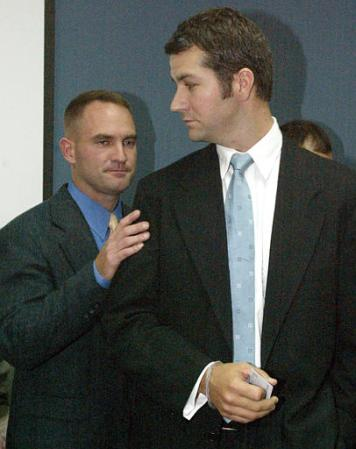

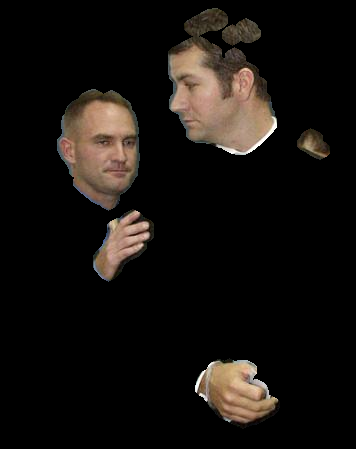

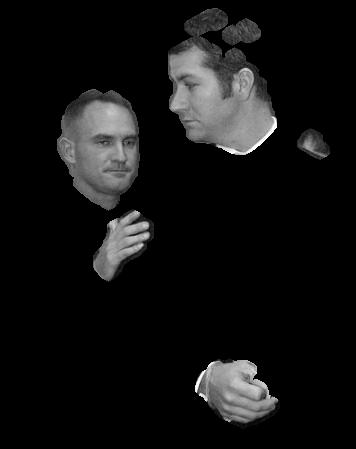

In [24]:
# Membaca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/29/big/img_889.jpg')

# Melakukan segmentasi kulit
skin_segmented_image = skin_segmentation(image)

# Mengubah citra segmentasi kulit menjadi citra keabuan
grayscale_image = convert_to_grayscale(skin_segmented_image)

# Menampilkan citra asli
cv2_imshow(image)

# Menampilkan citra segmentasi kulit
cv2_imshow(skin_segmented_image)

# Menampilkan citra keabuan
cv2_imshow(grayscale_image)

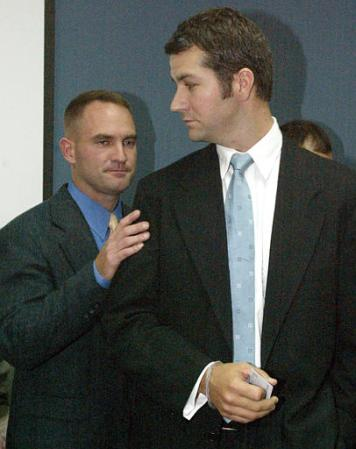

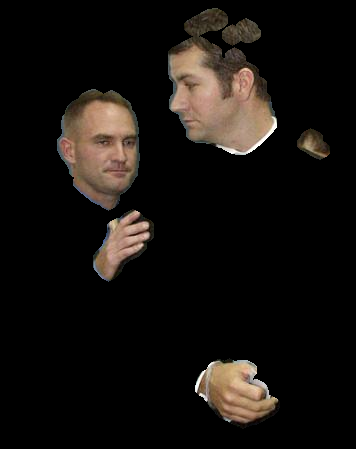

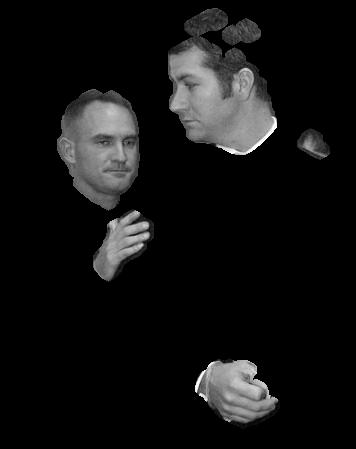

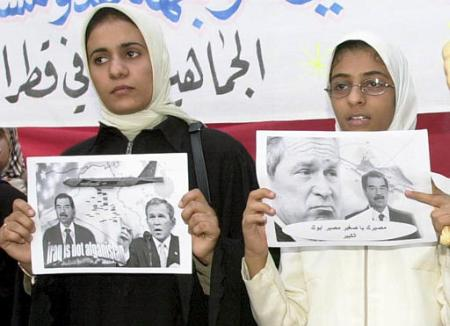

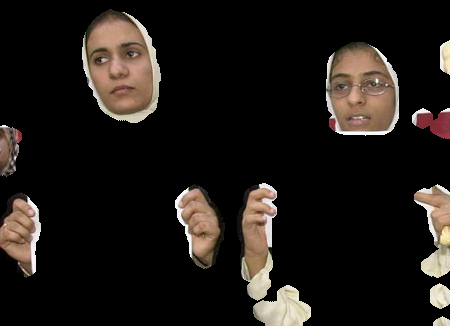

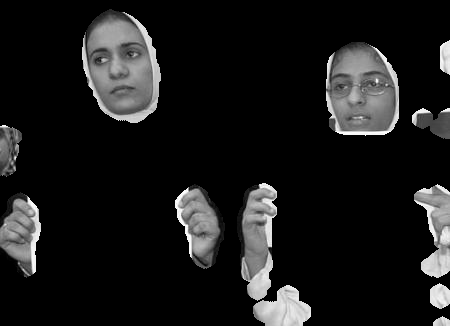

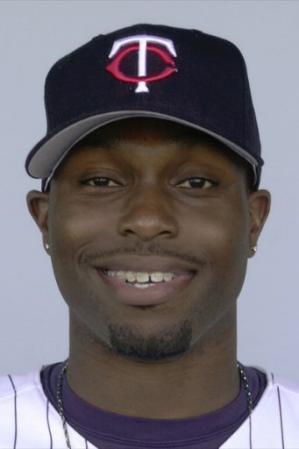

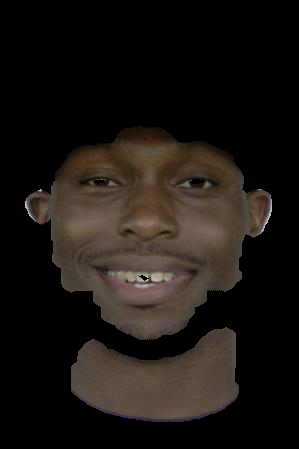

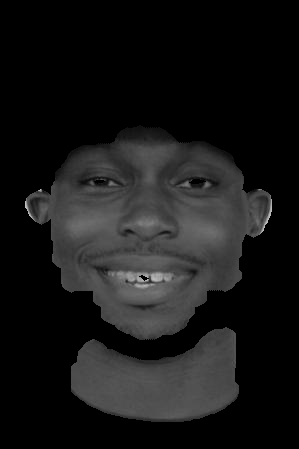

In [21]:
def skin_segmentation(image):
    # Mengubah citra menjadi ruang warna YCrCb
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Menginisialisasi batas atas dan batas bawah untuk deteksi kulit
    lower_skin = np.array([0, 133, 77], dtype=np.uint8)
    upper_skin = np.array([255, 173, 127], dtype=np.uint8)

    # Menerapkan mask untuk mendapatkan area kulit
    skin_mask = cv2.inRange(ycrcb, lower_skin, upper_skin)

    # Mengaplikasikan operasi morfologi untuk memperbaiki segmentasi kulit
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    skin_mask = cv2.dilate(skin_mask, kernel, iterations=1)

    # Menggabungkan mask dengan citra asli
    segmented = cv2.bitwise_and(image, image, mask=skin_mask)

    return segmented, skin_mask

def convert_to_grayscale(image):
    # Mengubah citra menjadi keabuan
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return grayscale

def find_face_contours(image):
    # Mengkonversi citra ke dalam citra biner
    ret, threshold = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

    # Mencari kontur pada citra biner
    contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Membuat list untuk menyimpan kontur wajah
    face_contours = []

    # Mengiterasi setiap kontur yang ditemukan
    for contour in contours:
        # Menghitung luas kontur
        area = cv2.contourArea(contour)

        # Mengecek apakah kontur memenuhi syarat sebagai wajah
        if area > 500:  # Sesuaikan ambang batas sesuai kebutuhan
            # Menambahkan kontur wajah ke dalam list
            face_contours.append(contour)

    return face_contours

# Daftar path gambar sample
image_paths = [
    '/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/29/big/img_889.jpg',
    '/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/29/big/img_624.jpg',
    '/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/19/big/img_230.jpg'
]

for image_path in image_paths:
    # Membaca citra
    image = cv2.imread(image_path)

    # Melakukan segmentasi kulit
    skin_segmented_image, skin_mask = skin_segmentation(image)

    # Mengubah citra segmentasi kulit menjadi citra keabuan
    grayscale_image = convert_to_grayscale(skin_segmented_image)

    # Mencari kontur wajah
    face_contours = find_face_contours(grayscale_image)

    # Menampilkan citra asli
    cv2_imshow(image)

    # Menampilkan citra segmentasi kulit
    cv2_imshow(skin_segmented_image)

    # Menampilkan citra keabuan
    cv2_imshow(grayscale_image)

